In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

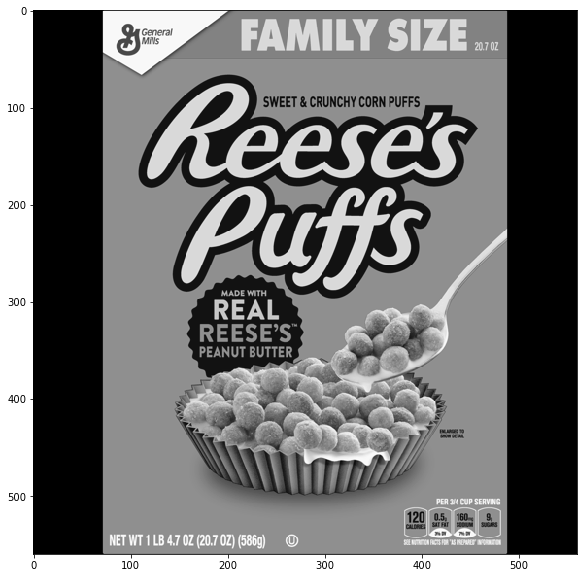

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread('DATA/many_cereals.jpg',0)

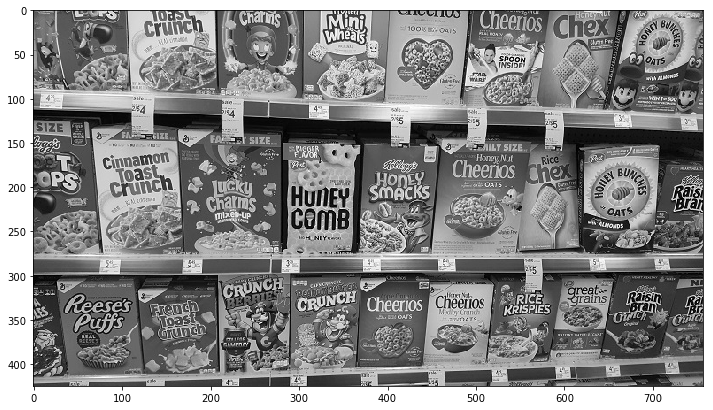

In [7]:
display(cereals)

## Brute Force Detection

In [9]:
orb = cv2.ORB_create() #creating a detector

In [13]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [14]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [15]:
matches = bf.match(des1,des2)

In [18]:
single_match = matches[0]

In [19]:
single_match.distance #Lower the distance higher the match, thats why we sort them below to extract best match

78.0

In [20]:
matches = sorted(matches,key=lambda x:x.distance)

In [21]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

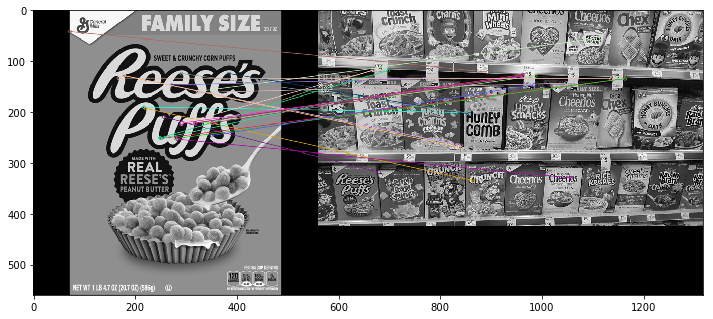

In [22]:
display(reeses_matches)

## SIFT Detection

In [23]:
sift = cv2.xfeatures2d.SIFT_create()

In [24]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [25]:
bf = cv2.BFMatcher()

In [26]:
matches = bf.knnMatch(des1,des2,k=2)

In [28]:
good = []

# less distance means better match
# ratio test to find best match
for match1,match2 in matches:
    # if match 1 distance is less than %75 of match 2 distance
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [29]:
len(good)

78

In [30]:
len(matches)

1500

In [37]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

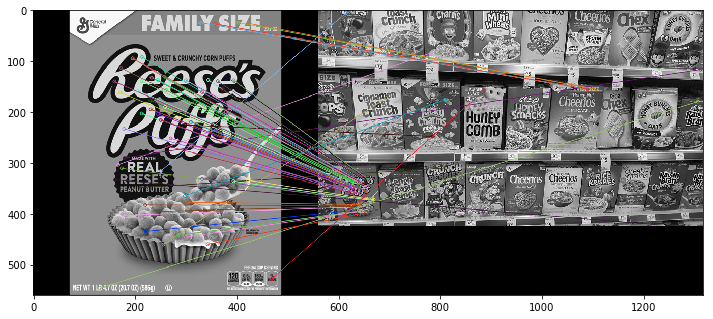

In [38]:
display(sift_matches)

## Flann Detector

In [39]:
sift = cv2.xfeatures2d.SIFT_create()

In [41]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [44]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [45]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [46]:
matches = flann.knnMatch(des1,des2,k=2)

In [47]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

In [51]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

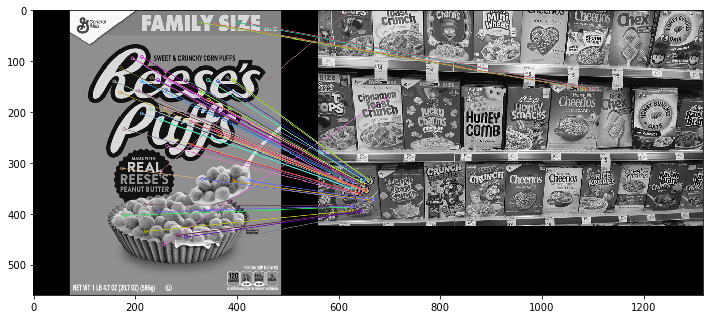

In [52]:
display(flann_matches)

## Creating the mask

In [53]:
sift = cv2.xfeatures2d.SIFT_create()

In [54]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [55]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [56]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [57]:
matches = flann.knnMatch(des1,des2,k=2)

In [58]:
matchesMask = [[0,0] for i in range(len(matches))]

In [60]:


for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        
        

In [61]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

In [63]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

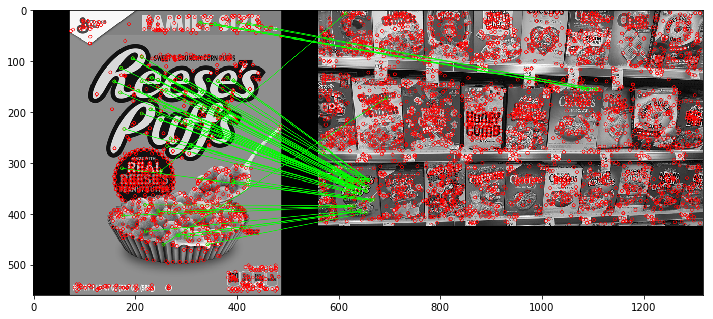

In [64]:
display(flann_matches)